In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#0)prepare data
x_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)

In [3]:
#cast to float tensor
x=torch.from_numpy(x_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)

In [4]:
n_samples,n_features=x.shape
#1)model
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)

In [5]:
#2)loss and optimizer
learning_rate=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [6]:
#3)training loop
num_epochs=100
for epoch in range(num_epochs):
    y_predicted=model(x)
    loss=criterion(y_predicted,y)
    #backward pass
    loss.backward()
    #update
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1)%10==0:
        print(f'epoch:{epoch+1},loss={loss.item():.4f}')


epoch:10,loss=4100.2642
epoch:20,loss=2888.9419
epoch:30,loss=2063.0852
epoch:40,loss=1499.9128
epoch:50,loss=1115.7920
epoch:60,loss=853.7433
epoch:70,loss=674.9377
epoch:80,loss=552.9081
epoch:90,loss=469.6109
epoch:100,loss=412.7417


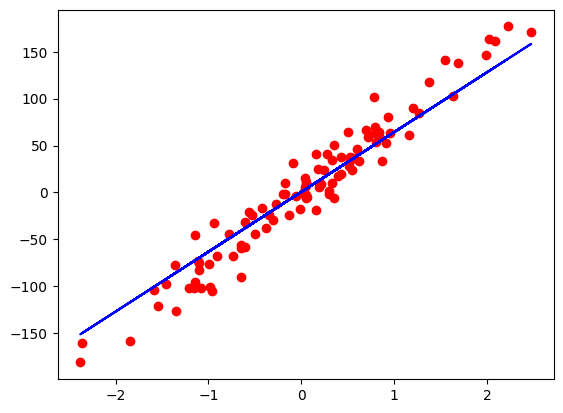

In [7]:
#plot
predicted=model(x).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()